Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [23]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# Import pandas library
import pandas as pd

# Load the movies dataset
movies_df = pd.read_csv('movies.csv')

# Print the first few rows of the DataFrame
print(movies_df.head())

# Drop unnecessary columns
columns_to_drop = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 
                   'production_companies', 'production_countries', 'status', 'tagline']
movies_df.drop(columns_to_drop, axis=1, inplace=True)


      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [34]:
print(movies_df.columns)


Index(['budget', 'genres', 'id', 'popularity', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count'],
      dtype='object')


#### Remove any duplicate rows

In [117]:
# Remove duplicate rows
movies_df.drop_duplicates(inplace=True)

# Check for duplicate rows
duplicate_rows = movies_df[movies_df.duplicated()]
print("Duplicate rows:", duplicate_rows)

Duplicate rows: Empty DataFrame
Columns: [budget, id, popularity, release_date, revenue, runtime, spoken_languages, title, vote_average, vote_count, release_year, genres, profit]
Index: []


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [119]:
# Load the DataFrame from the CSV file
movies_df = pd.read_csv('movies.csv')

# Remove rows with missing data
movies_df.dropna(inplace=True)

# Verify the removal by checking if there are any missing values left
print(movies_df.isnull().any())



budget                  False
genres                  False
homepage                False
id                      False
keywords                False
original_language       False
original_title          False
overview                False
popularity              False
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                 False
spoken_languages        False
status                  False
tagline                 False
title                   False
vote_average            False
vote_count              False
dtype: bool


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [121]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year

# Check DataFrame Information
print(movies_df.info())

# Inspect DataFrame
print(movies_df.head())

# Check for Release Year
print(movies_df['release_year'].unique())





<class 'pandas.core.frame.DataFrame'>
Index: 1493 entries, 0 to 4801
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                1493 non-null   int64         
 1   genres                1493 non-null   object        
 2   homepage              1493 non-null   object        
 3   id                    1493 non-null   int64         
 4   keywords              1493 non-null   object        
 5   original_language     1493 non-null   object        
 6   original_title        1493 non-null   object        
 7   overview              1493 non-null   object        
 8   popularity            1493 non-null   float64       
 9   production_companies  1493 non-null   object        
 10  production_countries  1493 non-null   object        
 11  release_date          1493 non-null   datetime64[ns]
 12  revenue               1493 non-null   int64         
 13  runtime               1

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [122]:

# Change budget and revenue columns to int64 data type
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

# Verify that he above has been done

print(movies_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1493 entries, 0 to 4801
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                1493 non-null   int64         
 1   genres                1493 non-null   object        
 2   homepage              1493 non-null   object        
 3   id                    1493 non-null   int64         
 4   keywords              1493 non-null   object        
 5   original_language     1493 non-null   object        
 6   original_title        1493 non-null   object        
 7   overview              1493 non-null   object        
 8   popularity            1493 non-null   float64       
 9   production_companies  1493 non-null   object        
 10  production_countries  1493 non-null   object        
 11  release_date          1493 non-null   datetime64[ns]
 12  revenue               1493 non-null   int64         
 13  runtime               1

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [137]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [126]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].apply(lambda x: 'Action' in x)]

# Check the shape of the action_movies DataFrame
print("Shape of action_movies DataFrame:", action_movies.shape)

# Print a sample of rows from the action_movies DataFrame
print("Sample of movies in the Action genre:")
print(action_movies.head())



Shape of action_movies DataFrame: (417, 21)
Sample of movies in the Action genre:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 2

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [127]:
# Sort the dataframe by 'budget' column in descending order
most_expensive_movies = movies_df.sort_values(by='budget', ascending=False)

# Select the top 5 rows
top_5_expensive_movies = most_expensive_movies.head(5)

# Display the result
print(top_5_expensive_movies[['title', 'budget']])


                                          title     budget
17  Pirates of the Caribbean: On Stranger Tides  380000000
1      Pirates of the Caribbean: At World's End  300000000
7                       Avengers: Age of Ultron  280000000
4                                   John Carter  260000000
6                                       Tangled  260000000


#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [128]:
# Calculate profit
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Sort movies by profit in descending order and select the top 5
top_profitable_movies = movies_df[['title', 'profit']].sort_values(by='profit', ascending=False).head(5)

print(top_profitable_movies)



             title      profit
0           Avatar  2550965087
25         Titanic  1645034188
28  Jurassic World  1363528810
44       Furious 7  1316249360
16    The Avengers  1299557910


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [129]:
# Sort the dataframe based on the popularity column
most_popular_movies = movies_df.sort_values(by='popularity', ascending=False)

# Display the most popular movies
print(most_popular_movies[['title', 'popularity']].head())



                       title  popularity
546                  Minions  875.581305
95              Interstellar  724.247784
788                 Deadpool  514.569956
94   Guardians of the Galaxy  481.098624
127       Mad Max: Fury Road  434.278564


#### Find Movies which are rated above 7

In [130]:
# Filter movies with a rating above 7
highly_rated_movies = movies_df[movies_df['vote_average'] > 7]

# Display the highly rated movies
print(highly_rated_movies[['title', 'vote_average']])

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(highly_rated_movies[['title', 'vote_average']])


                                                  title  vote_average
0                                                Avatar           7.2
3                                 The Dark Knight Rises           7.6
6                                               Tangled           7.4
7                               Avengers: Age of Ultron           7.3
8                Harry Potter and the Half-Blood Prince           7.4
16                                         The Avengers           7.4
19            The Hobbit: The Battle of the Five Armies           7.1
22                  The Hobbit: The Desolation of Smaug           7.6
25                                              Titanic           7.5
26                           Captain America: Civil War           7.1
42                                          Toy Story 3           7.6
44                                            Furious 7           7.3
46                           X-Men: Days of Future Past           7.5
57                  

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

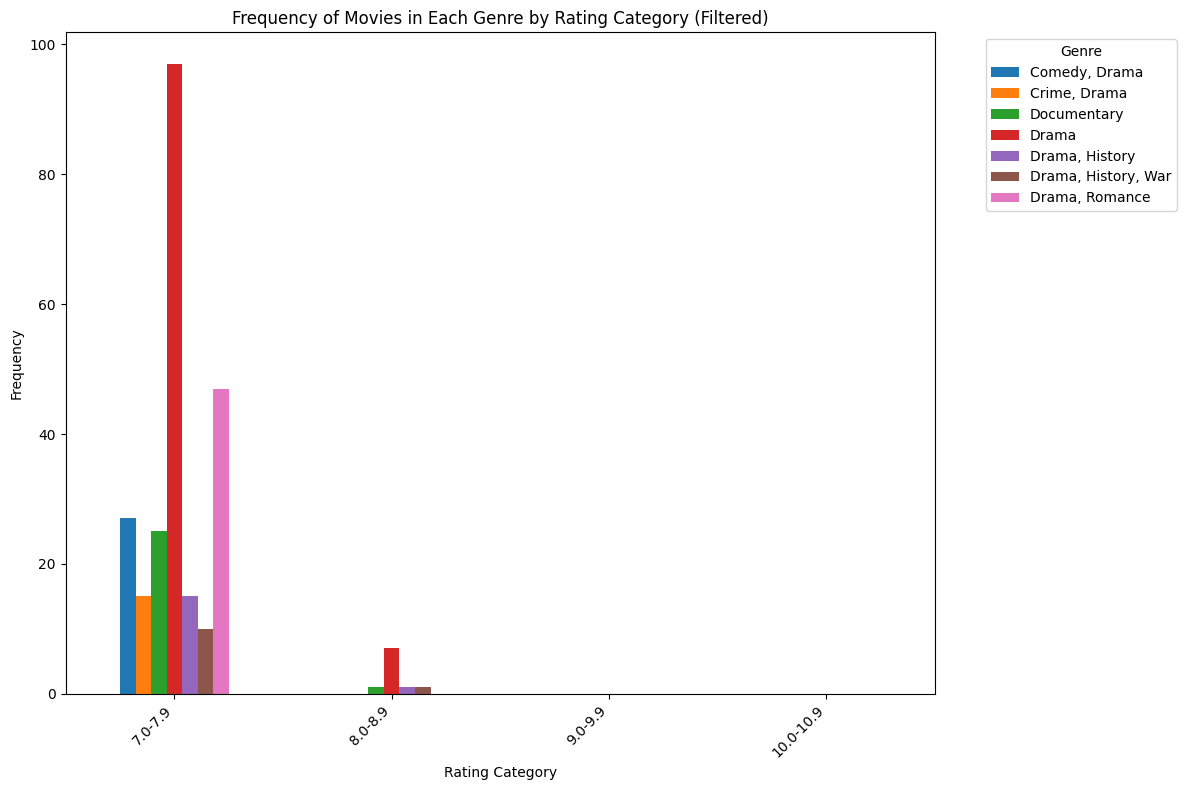

In [135]:
# Filter out less frequent genres
min_genre_frequency = 10  # Set your desired threshold
filtered_genre_counts = genre_counts_by_rating.loc[:, genre_counts_by_rating.columns[(genre_counts_by_rating >= min_genre_frequency).any()]]

# Plotting the bar chart (not stacked)
filtered_genre_counts.plot(kind='bar', figsize=(12, 8))  # Removed stacked=True
plt.title('Frequency of Movies in Each Genre by Rating Category (Filtered)')
plt.xlabel('Rating Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

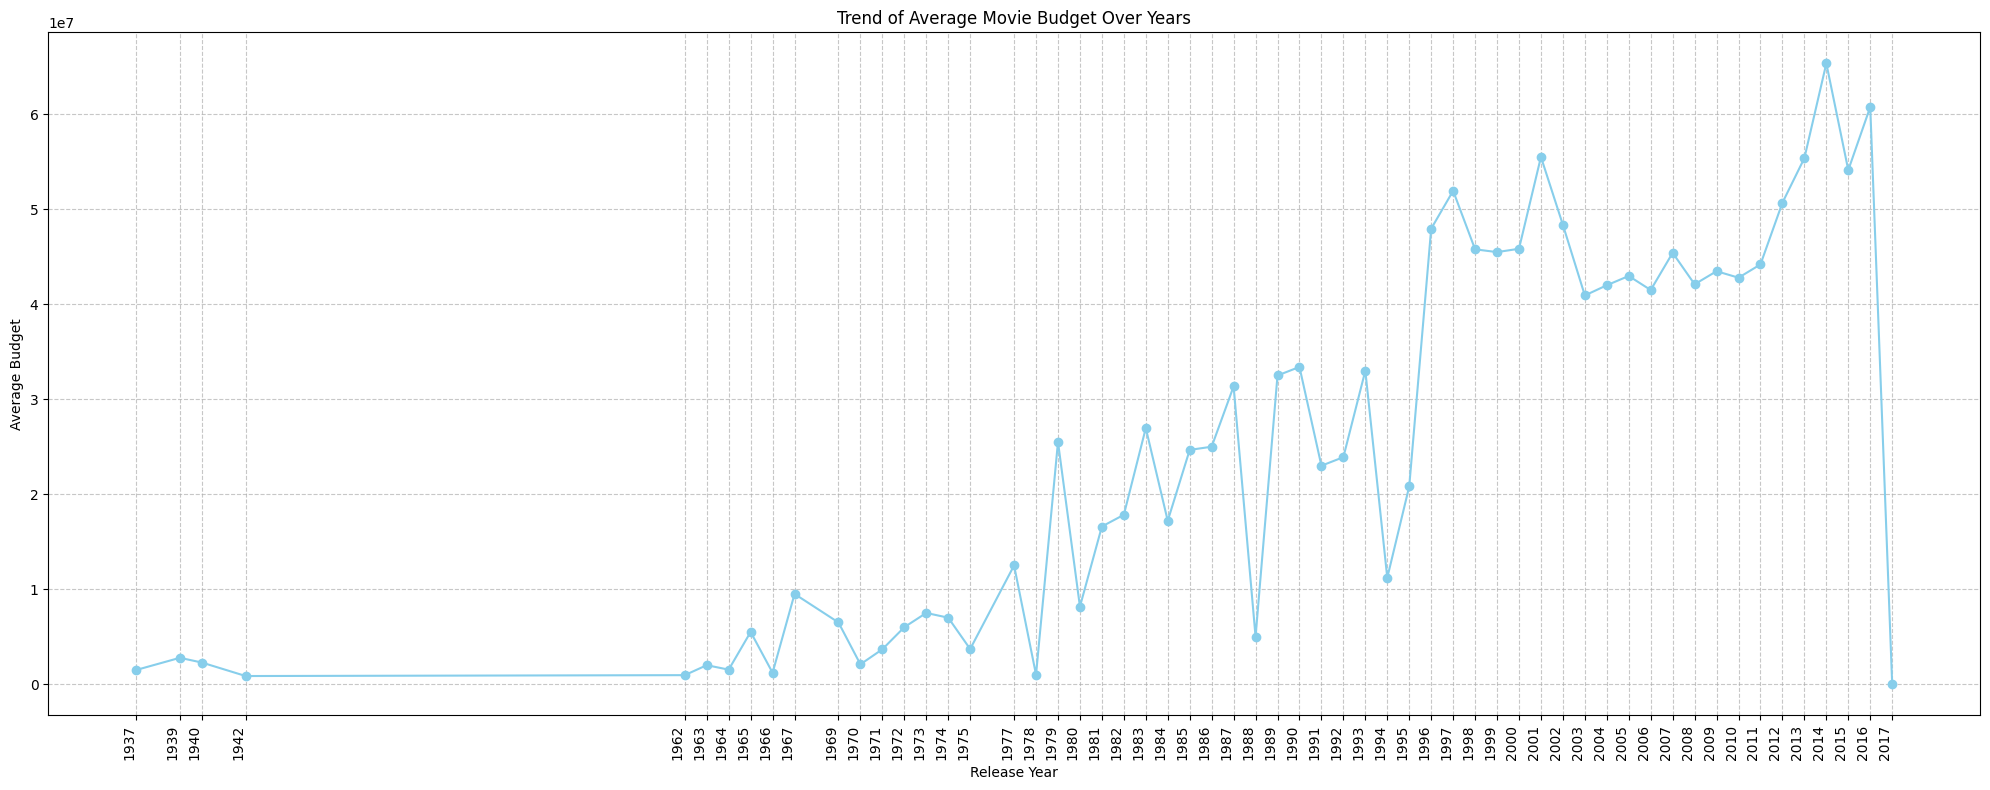

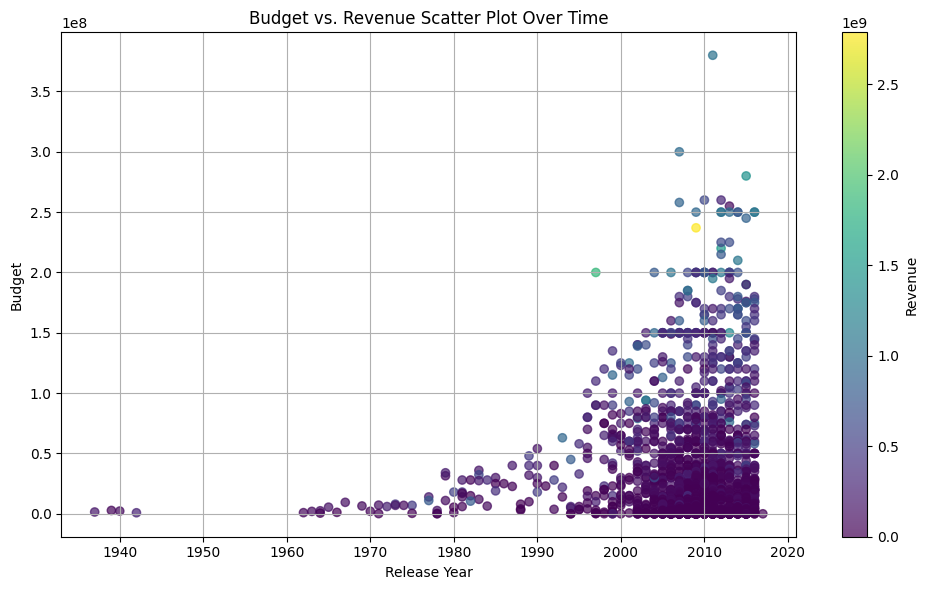

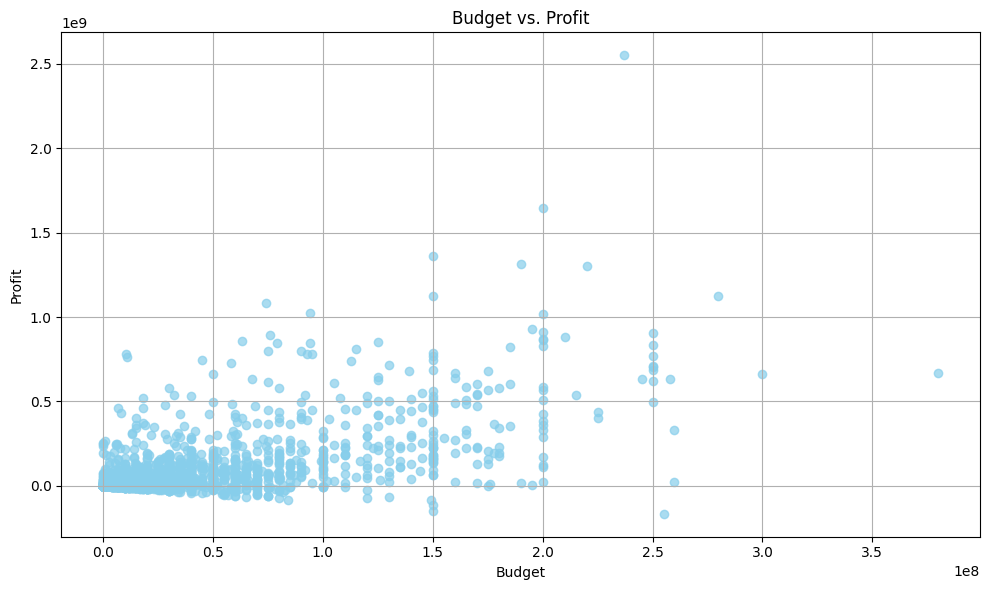

In [136]:
# Generate three different interesting visualisations with a data story.

# Calculate average budget for each year to see the trend of average movie budget over the years
average_budget_year = movies_df.groupby('release_year')['budget'].mean()

# Plotting
plt.figure(figsize=(20, 8))  # Increase figure size for better readability
plt.plot(average_budget_year.index, average_budget_year.values, marker='o', color='skyblue', linestyle='-')
plt.title('Trend of Average Movie Budget Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Budget')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(average_budget_year.index, rotation=90, ha='right')  # Rotate labels by 90 degrees and align them to the right
plt.tight_layout()
plt.show()


# Drop rows with missing budget, revenue, or release year data
movies_df.dropna(subset=['budget', 'revenue', 'release_year'], inplace=True)

# Create the scatter plot illustrating the relationship between movie budgets and revenues over time
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['release_year'], movies_df['budget'], c=movies_df['revenue'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Revenue')
plt.title('Budget vs. Revenue Scatter Plot Over Time')
plt.xlabel('Release Year')
plt.ylabel('Budget')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate profit
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Create a scatter plot where the x-axis represents the budget and the y-axis represents the profit.
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['budget'], movies_df['profit'], color='skyblue', alpha=0.7)
plt.title('Budget vs. Profit')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()
